<a href="https://colab.research.google.com/github/Kalashri21/Kalashri-Borhade/blob/main/Weather_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
wd  = pd.read_csv('/Weather Data.csv')

In [ ]:
wd.head()

In [ ]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
wd.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [ ]:
# Split Date/Time into Date and Time
wd[['Date','Time']] = wd['Date/Time'].str.split(' ',expand=True)

In [ ]:
# Convert Date column to Date
wd['Date'] = pd.to_datetime(wd['Date'])

In [ ]:
# Getting seasons
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

wd['Month'] = wd['Date'].dt.month
wd['Season'] = wd['Month'].apply(get_season)

In [ ]:
# Rearrange columns
wd= wd[['Date', 'Month', 'Time', 'Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km' ,'Press_kPa', 'Weather', 'Season']]
wd = wd.reset_index()

In [ ]:
wd.head()

,index,Date,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Season
0,0,2012-01-01,1,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Winter
1,1,2012-01-01,1,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Winter
2,2,2012-01-01,1,2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Winter
3,3,2012-01-01,1,3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",Winter
4,4,2012-01-01,1,4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,Winter


In [ ]:
weather_count = len(wd['Weather'].unique())

print('There are {} different weathers'.format(weather_count))

There are 50 different weathers


In [ ]:
# Set default values for the graph plot
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

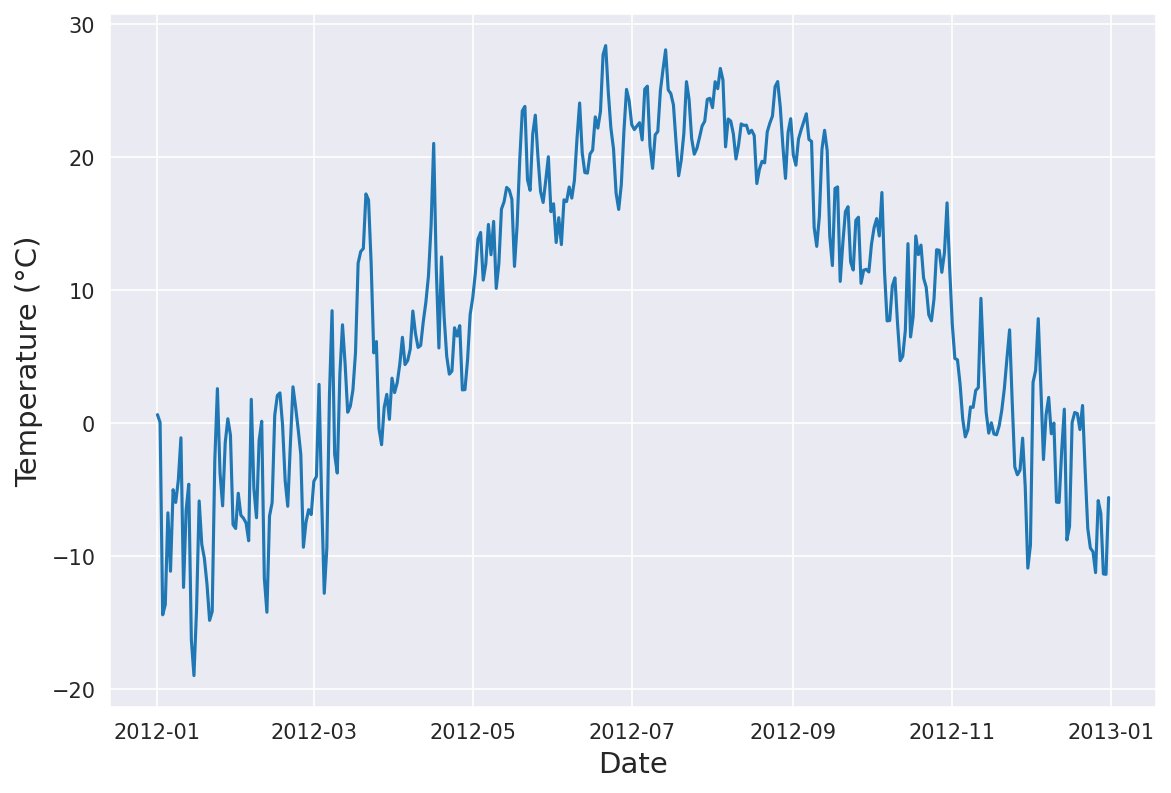

In [ ]:
sns.lineplot(x ="Date", y = "Temp_C", data= wd, errorbar= None)
plt.ylabel("Temperature (°C)");

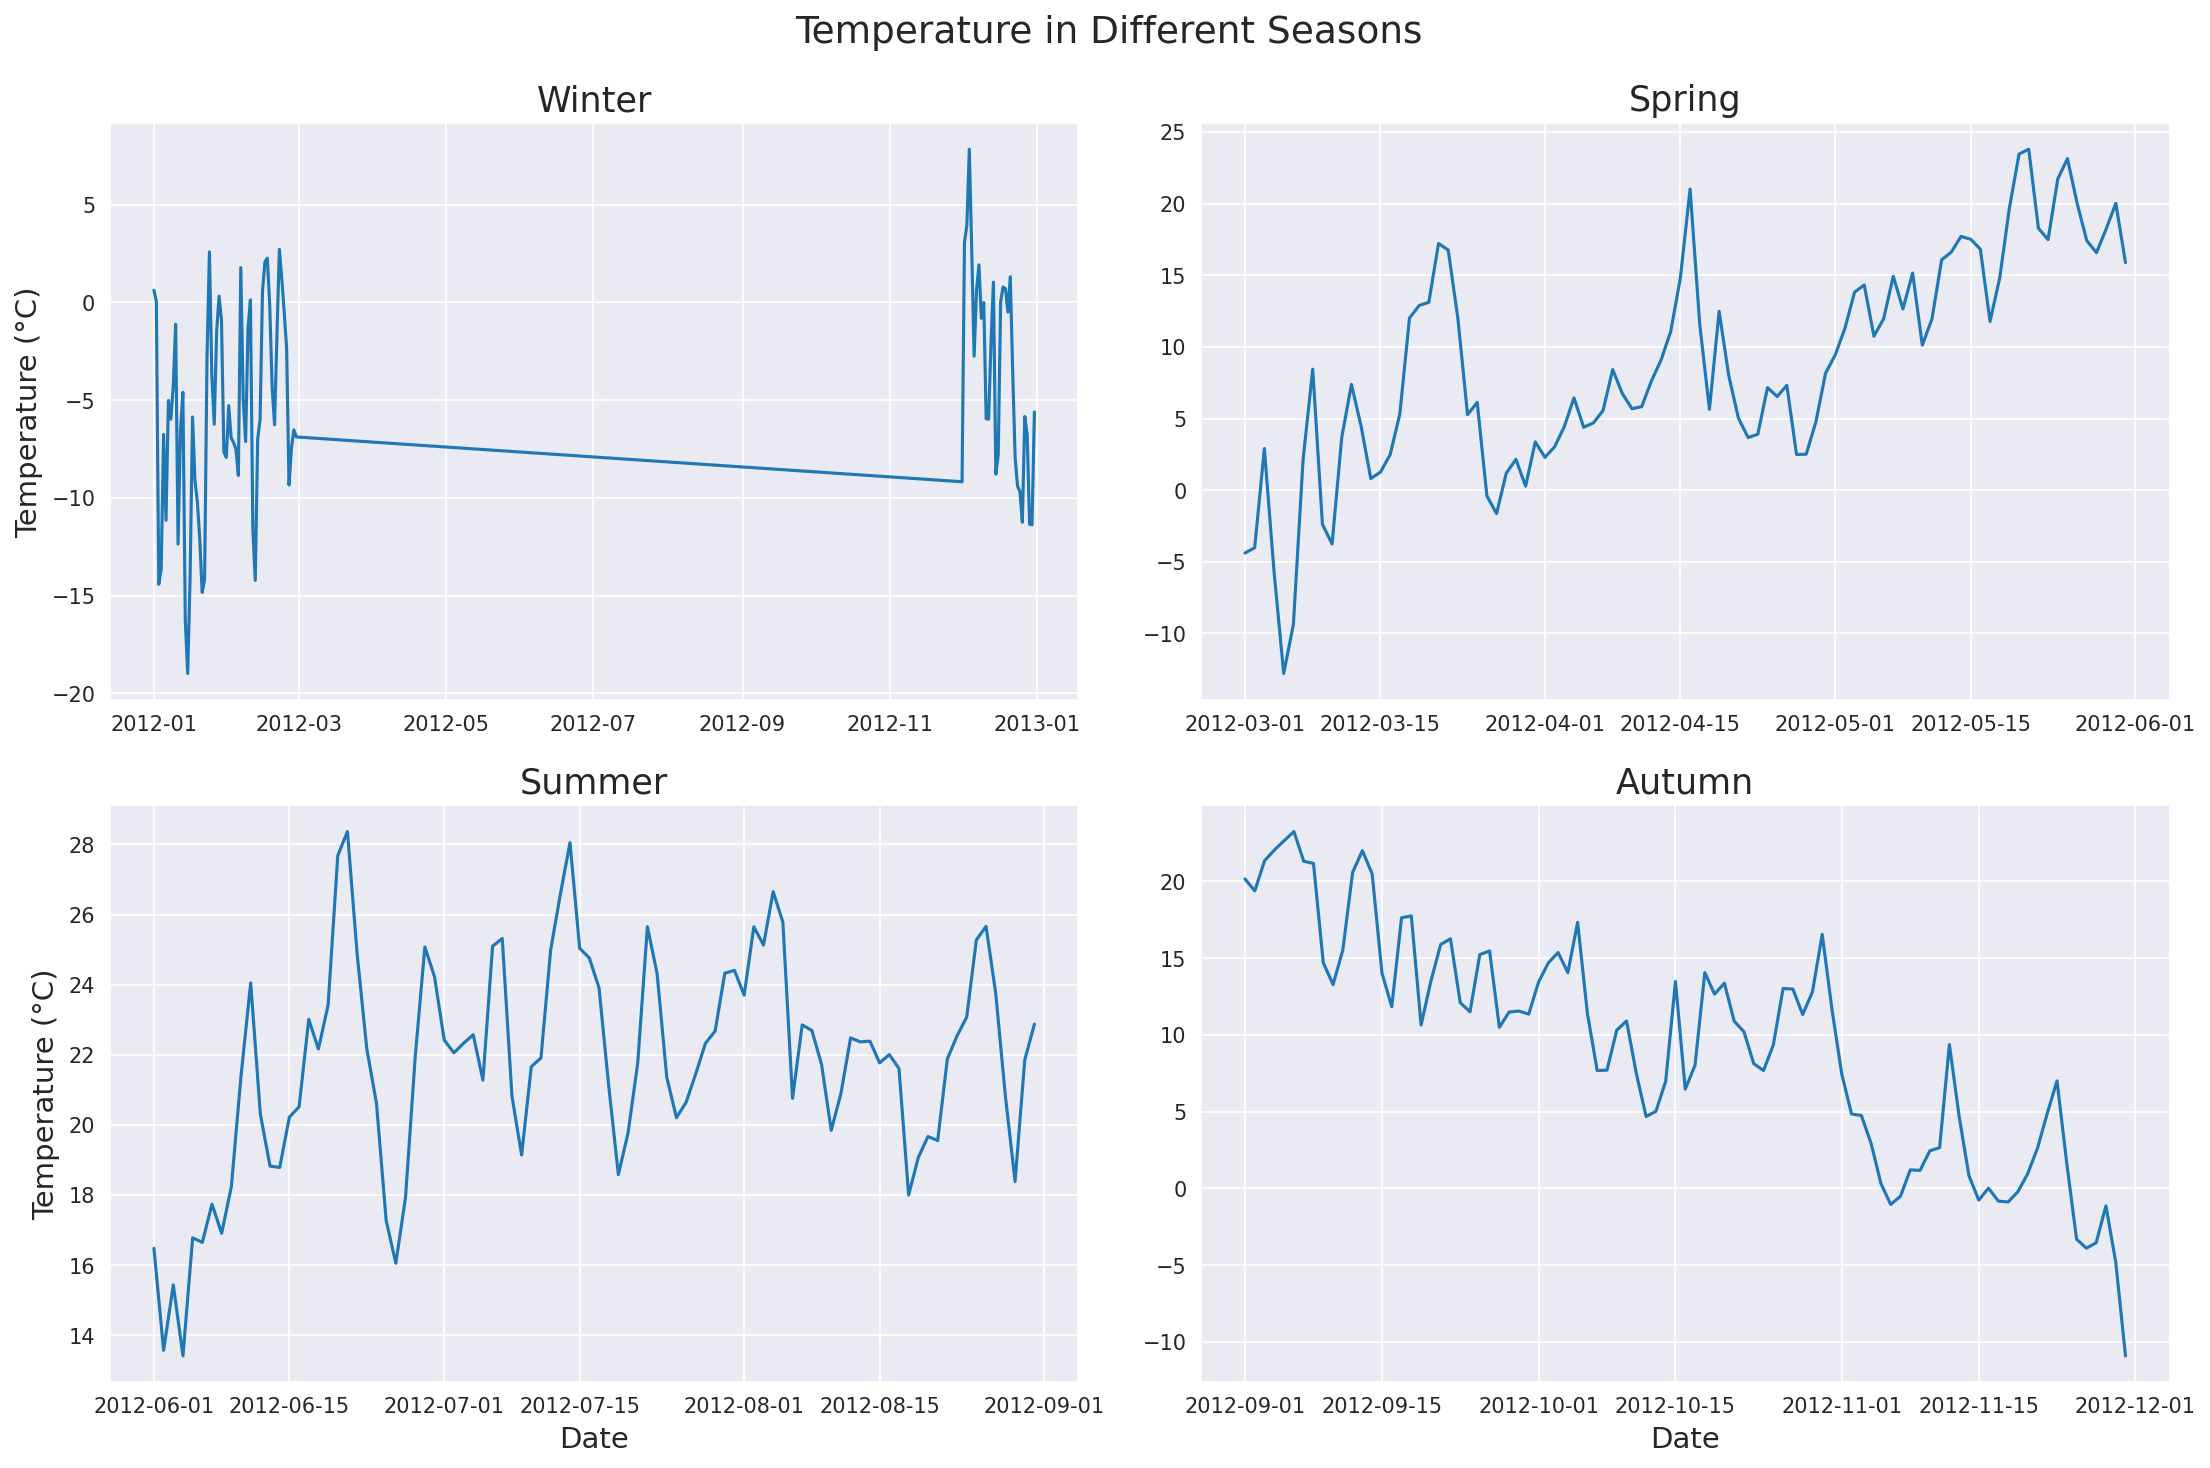

In [ ]:
seasons = wd['Season'].unique()

fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, season in enumerate(seasons):
    wd_season = wd[wd['Season'] == season]
    sns.lineplot(x ='Date', y = "Temp_C", data= wd_season, ax=axs[i], errorbar= None)
    axs[i].set_title(f'{season}')
    axs[i].set_ylabel('Temperature (°C)')

    # Remove y-label from 2nd and 4th subplots
    if i == 1 or i == 3:
        axs[i].set_ylabel('')

    if i < 2:
        # Remove x label and x-ticks
        axs[i].set_xlabel('')

plt.suptitle('Temperature in Different Seasons', fontsize=18)
plt.tight_layout()
plt.show()

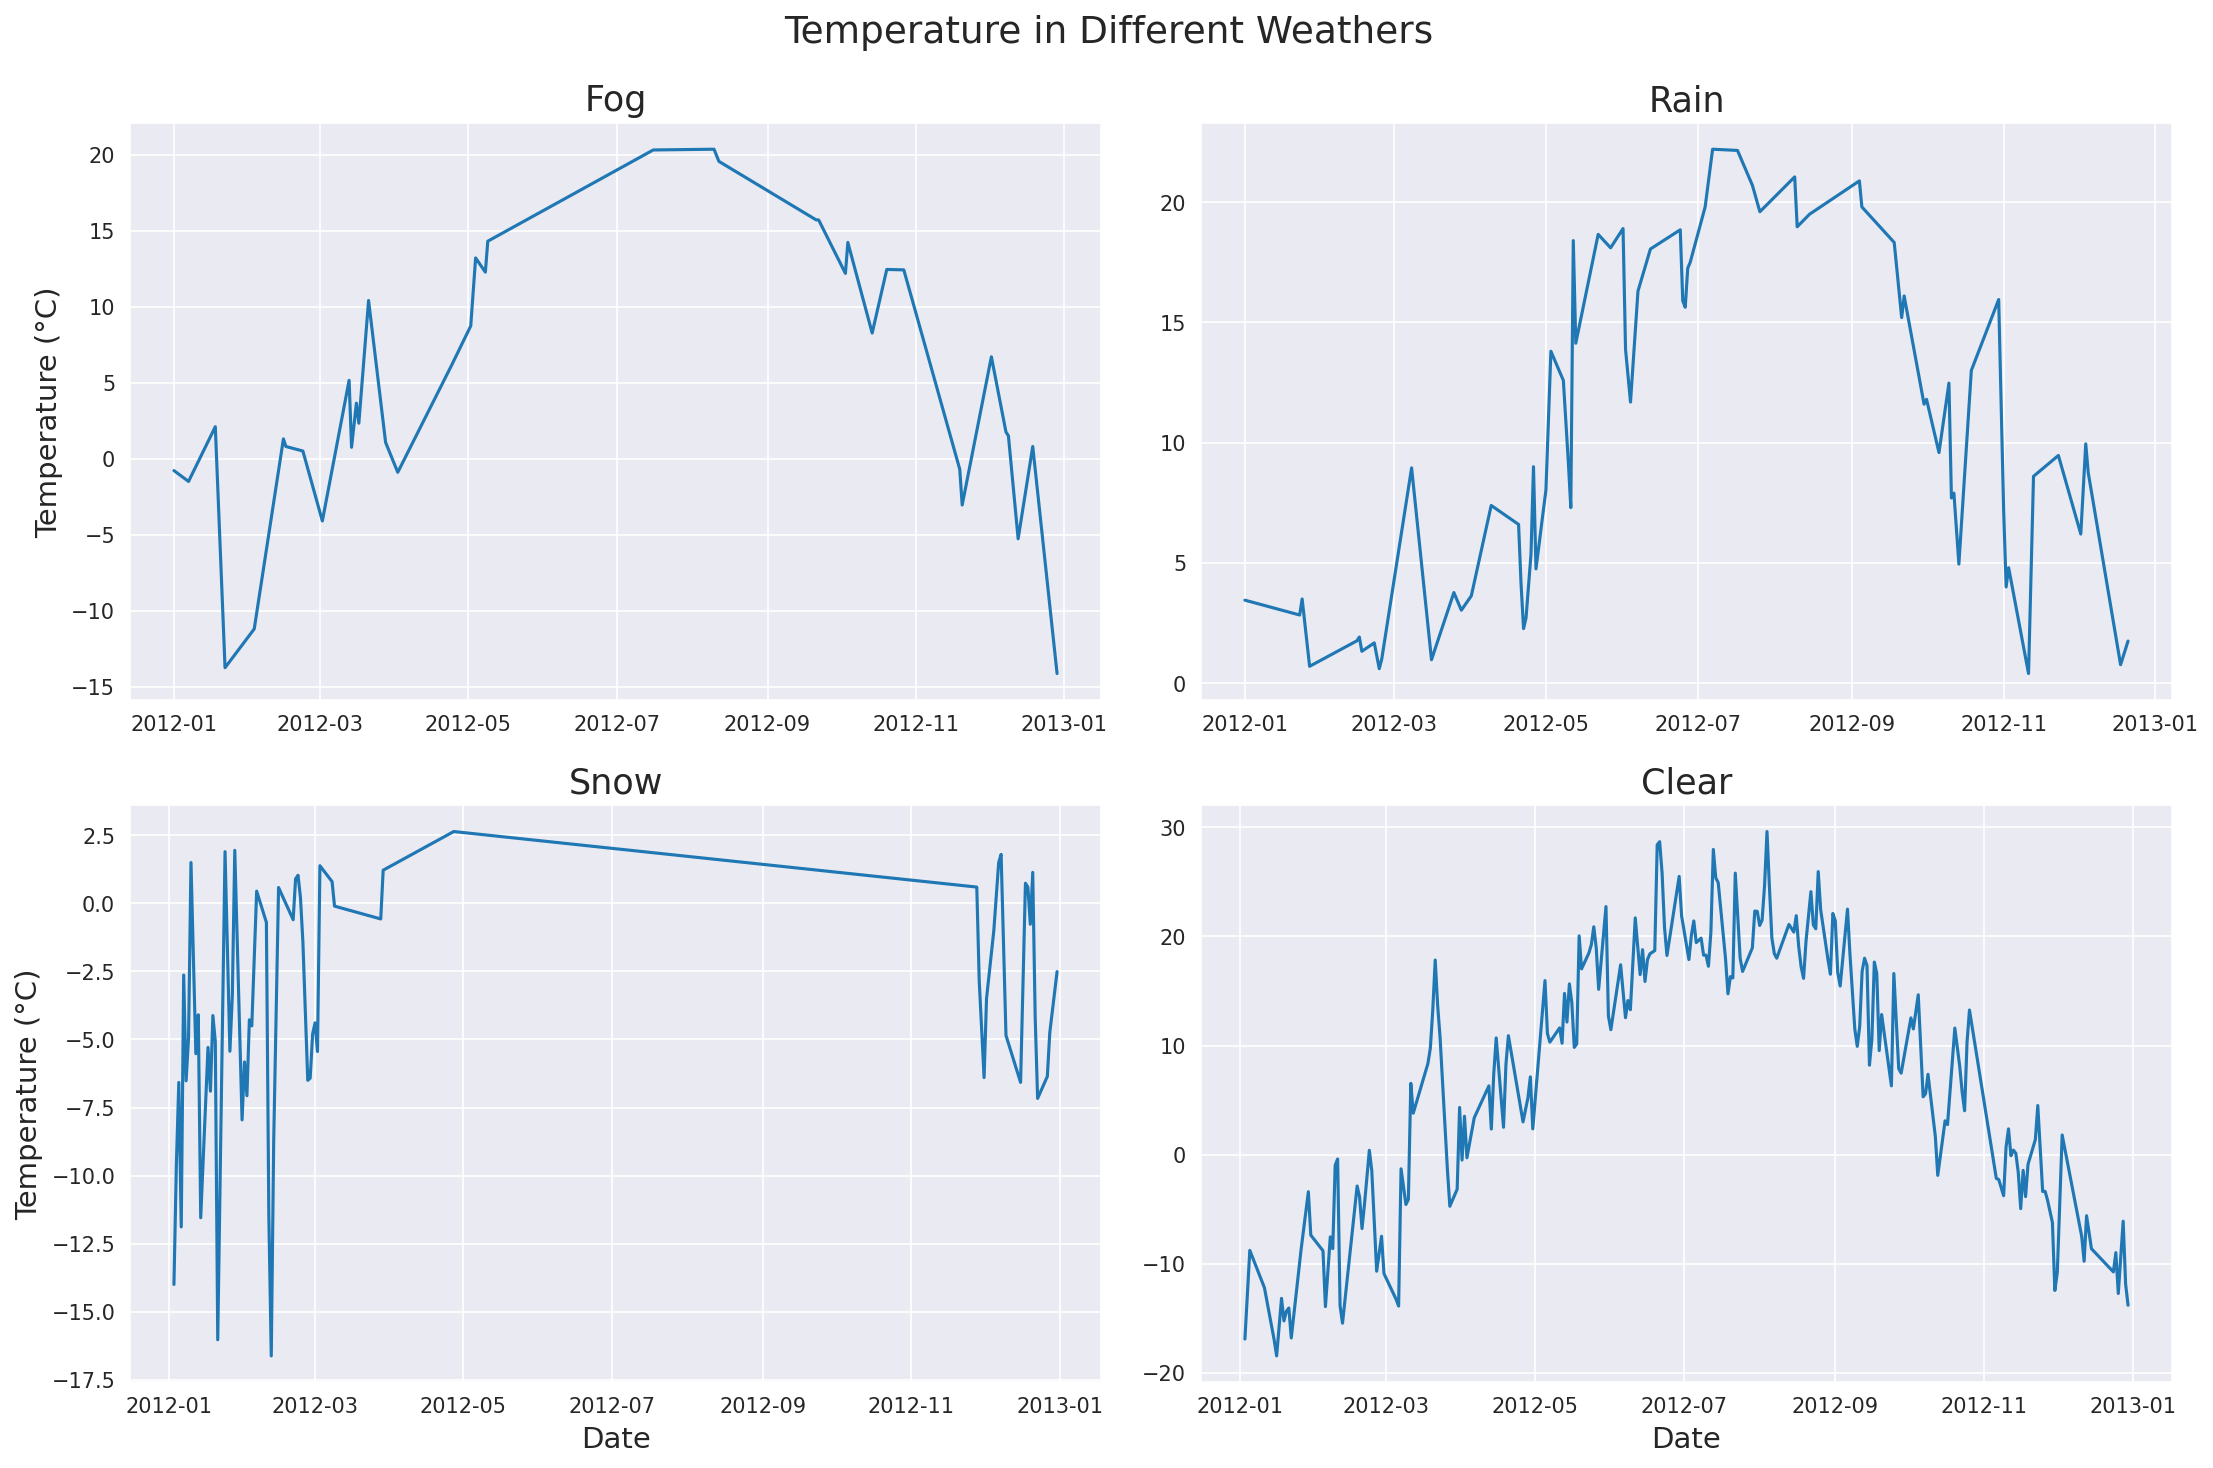

In [ ]:
# Calculate the frequency of each unique value in the 'Weather' column
weather_wd = wd[wd['Weather'].isin(['Clear', 'Snow', 'Rain', 'Fog'])]

weather_conditions = weather_wd['Weather'].unique()

fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, weather in enumerate(weather_conditions):
    wd_weather = weather_wd[weather_wd['Weather'] == weather]
    sns.lineplot(x ='Date', y = "Temp_C", data= wd_weather, ax=axs[i], errorbar= None)
    axs[i].set_title(f'{weather}')
    axs[i].set_ylabel('Temperature (°C)')

    # Remove y-label from 2nd and 4th subplots
    if i == 1 or i == 3:
        axs[i].set_ylabel('')

    if i < 2:
        # Remove x label and x-ticks
        axs[i].set_xlabel('')

plt.suptitle('Temperature in Different Weathers', fontsize=18)
plt.tight_layout()
plt.show()


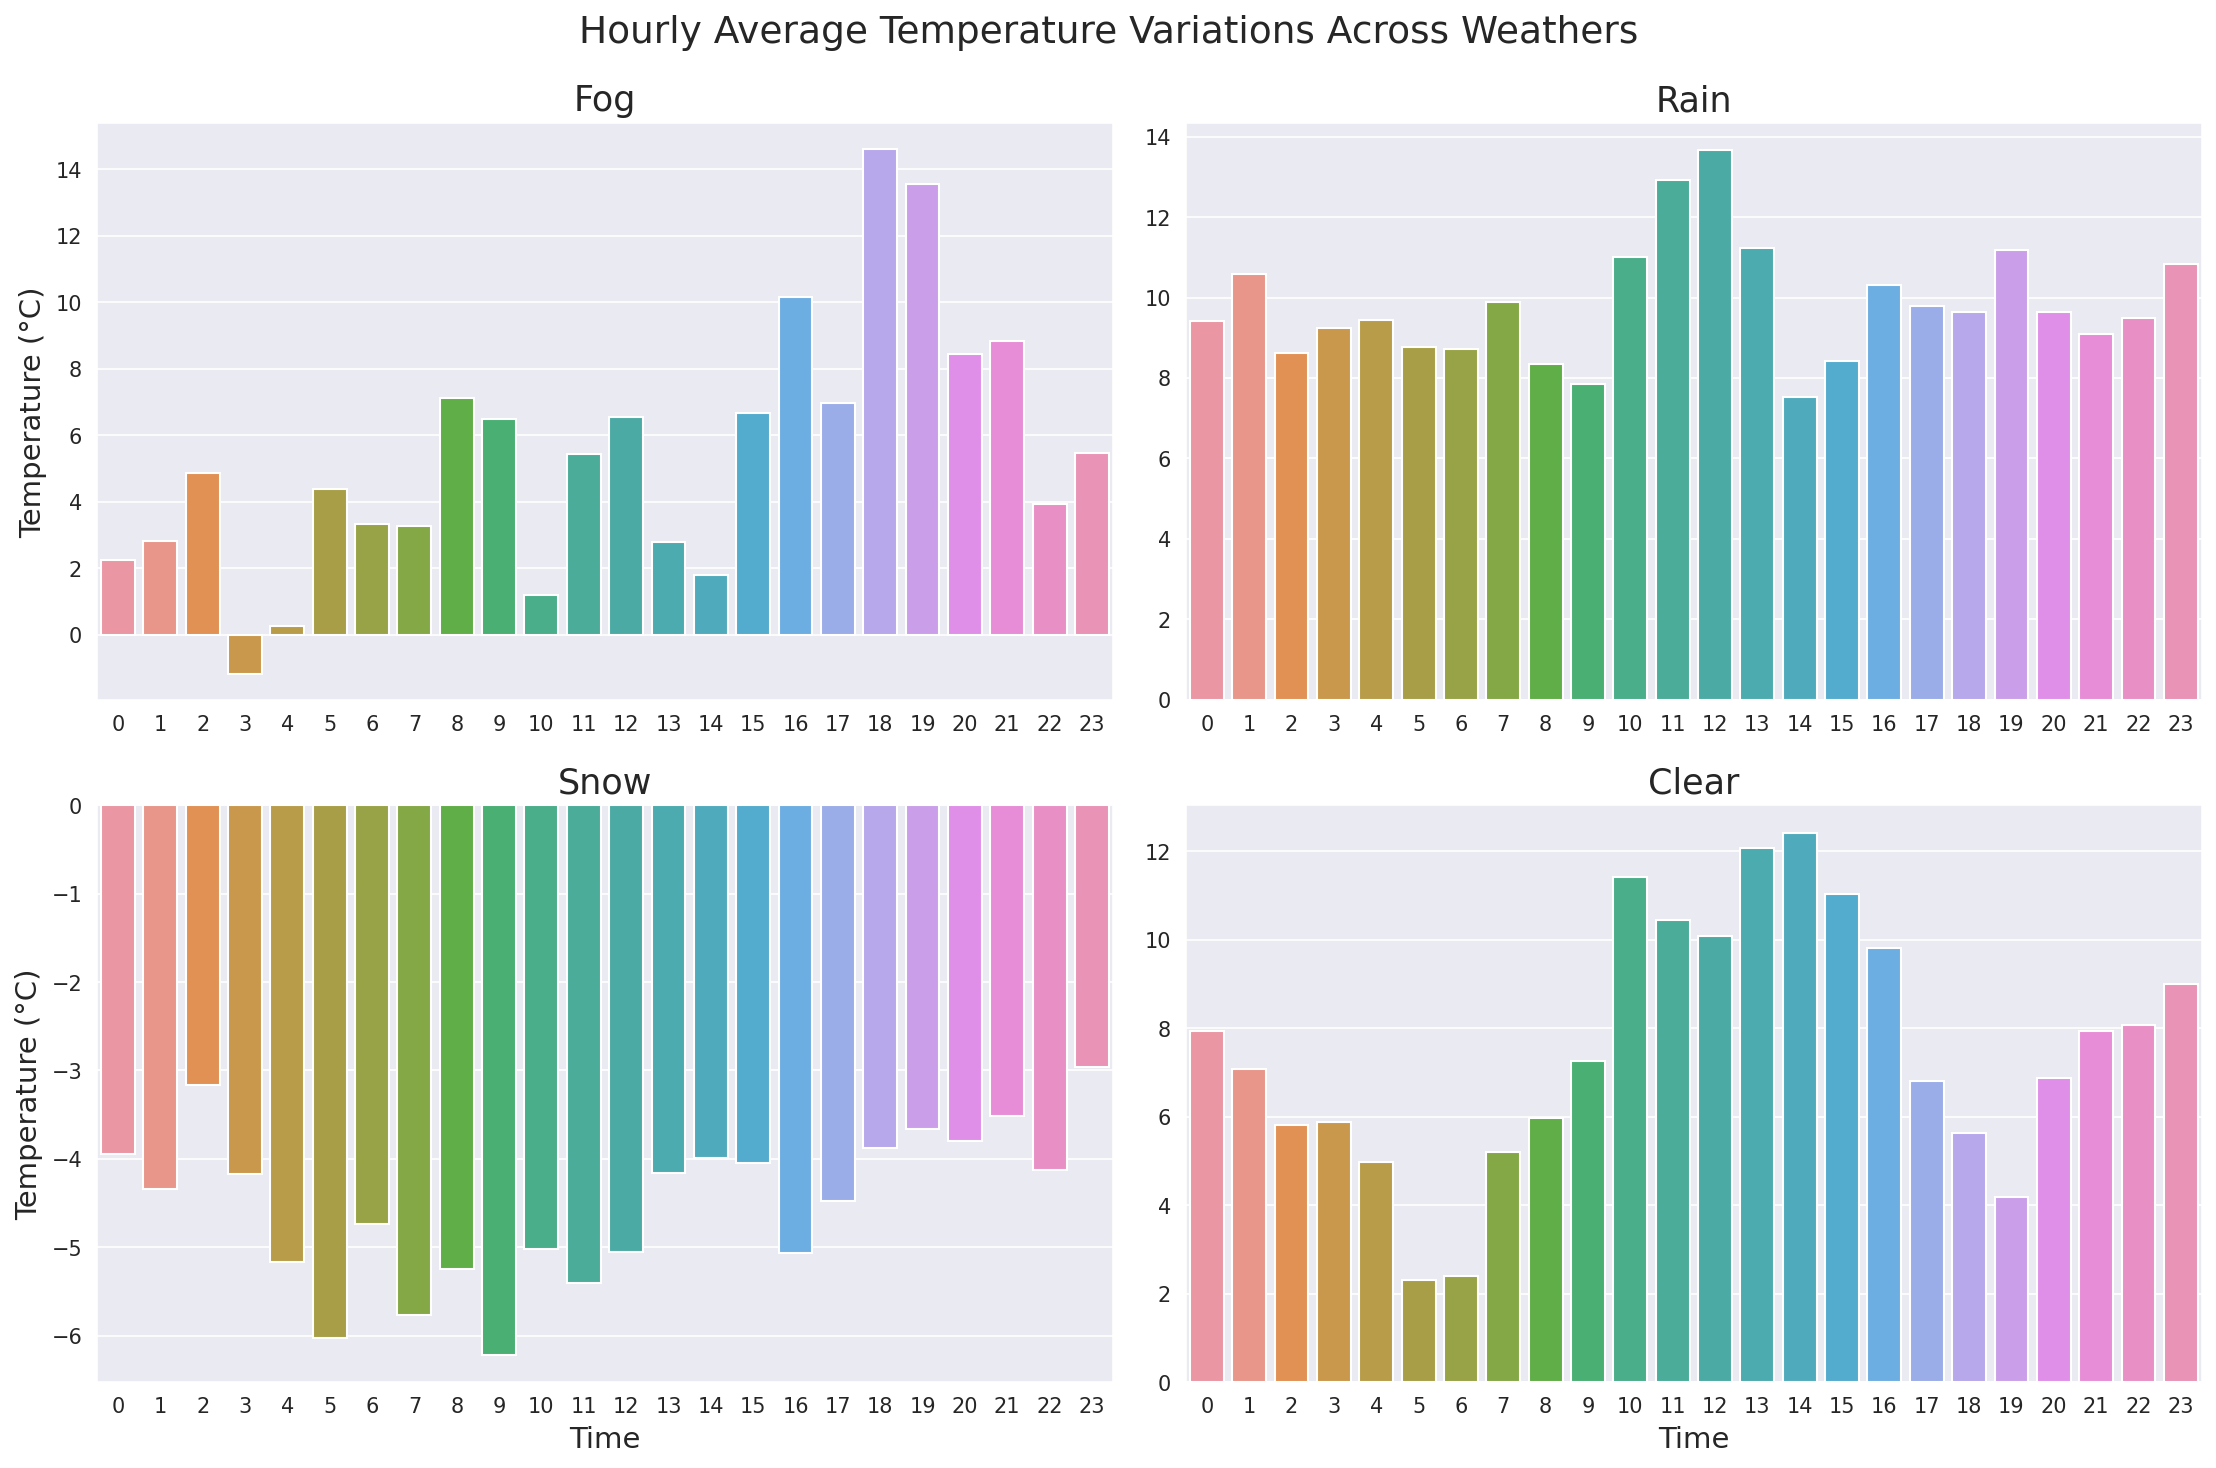

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, weather in enumerate(weather_conditions):
    wd_weather = weather_wd[weather_wd['Weather'] == weather]
    sns.barplot(x =wd['Time'].str.split(':').str[0], y = "Temp_C", data= wd_weather, ax=axs[i], errorbar= None)
    axs[i].set_title(f'{weather}')
    axs[i].set_ylabel('Temperature (°C)')

    # Remove y-label from 2nd and 4th subplots
    if i == 1 or i == 3:
        axs[i].set_ylabel('')

    if i < 2:
        # Remove x label
        axs[i].set_xlabel('')

plt.suptitle('Hourly Average Temperature Variations Across Weathers', fontsize=18)
plt.tight_layout()
plt.show()


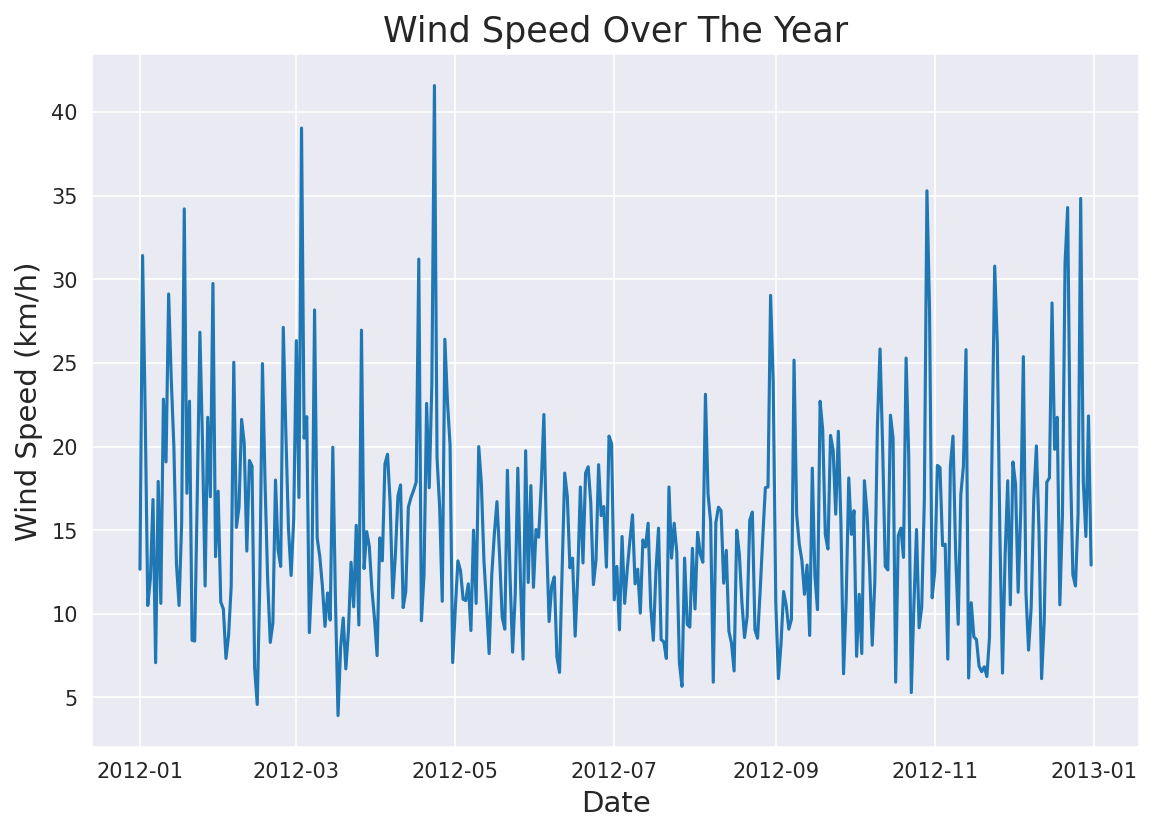

In [ ]:
sns.lineplot(x ="Date", y = "Wind Speed_km/h", data= wd, errorbar= None)
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed Over The Year');

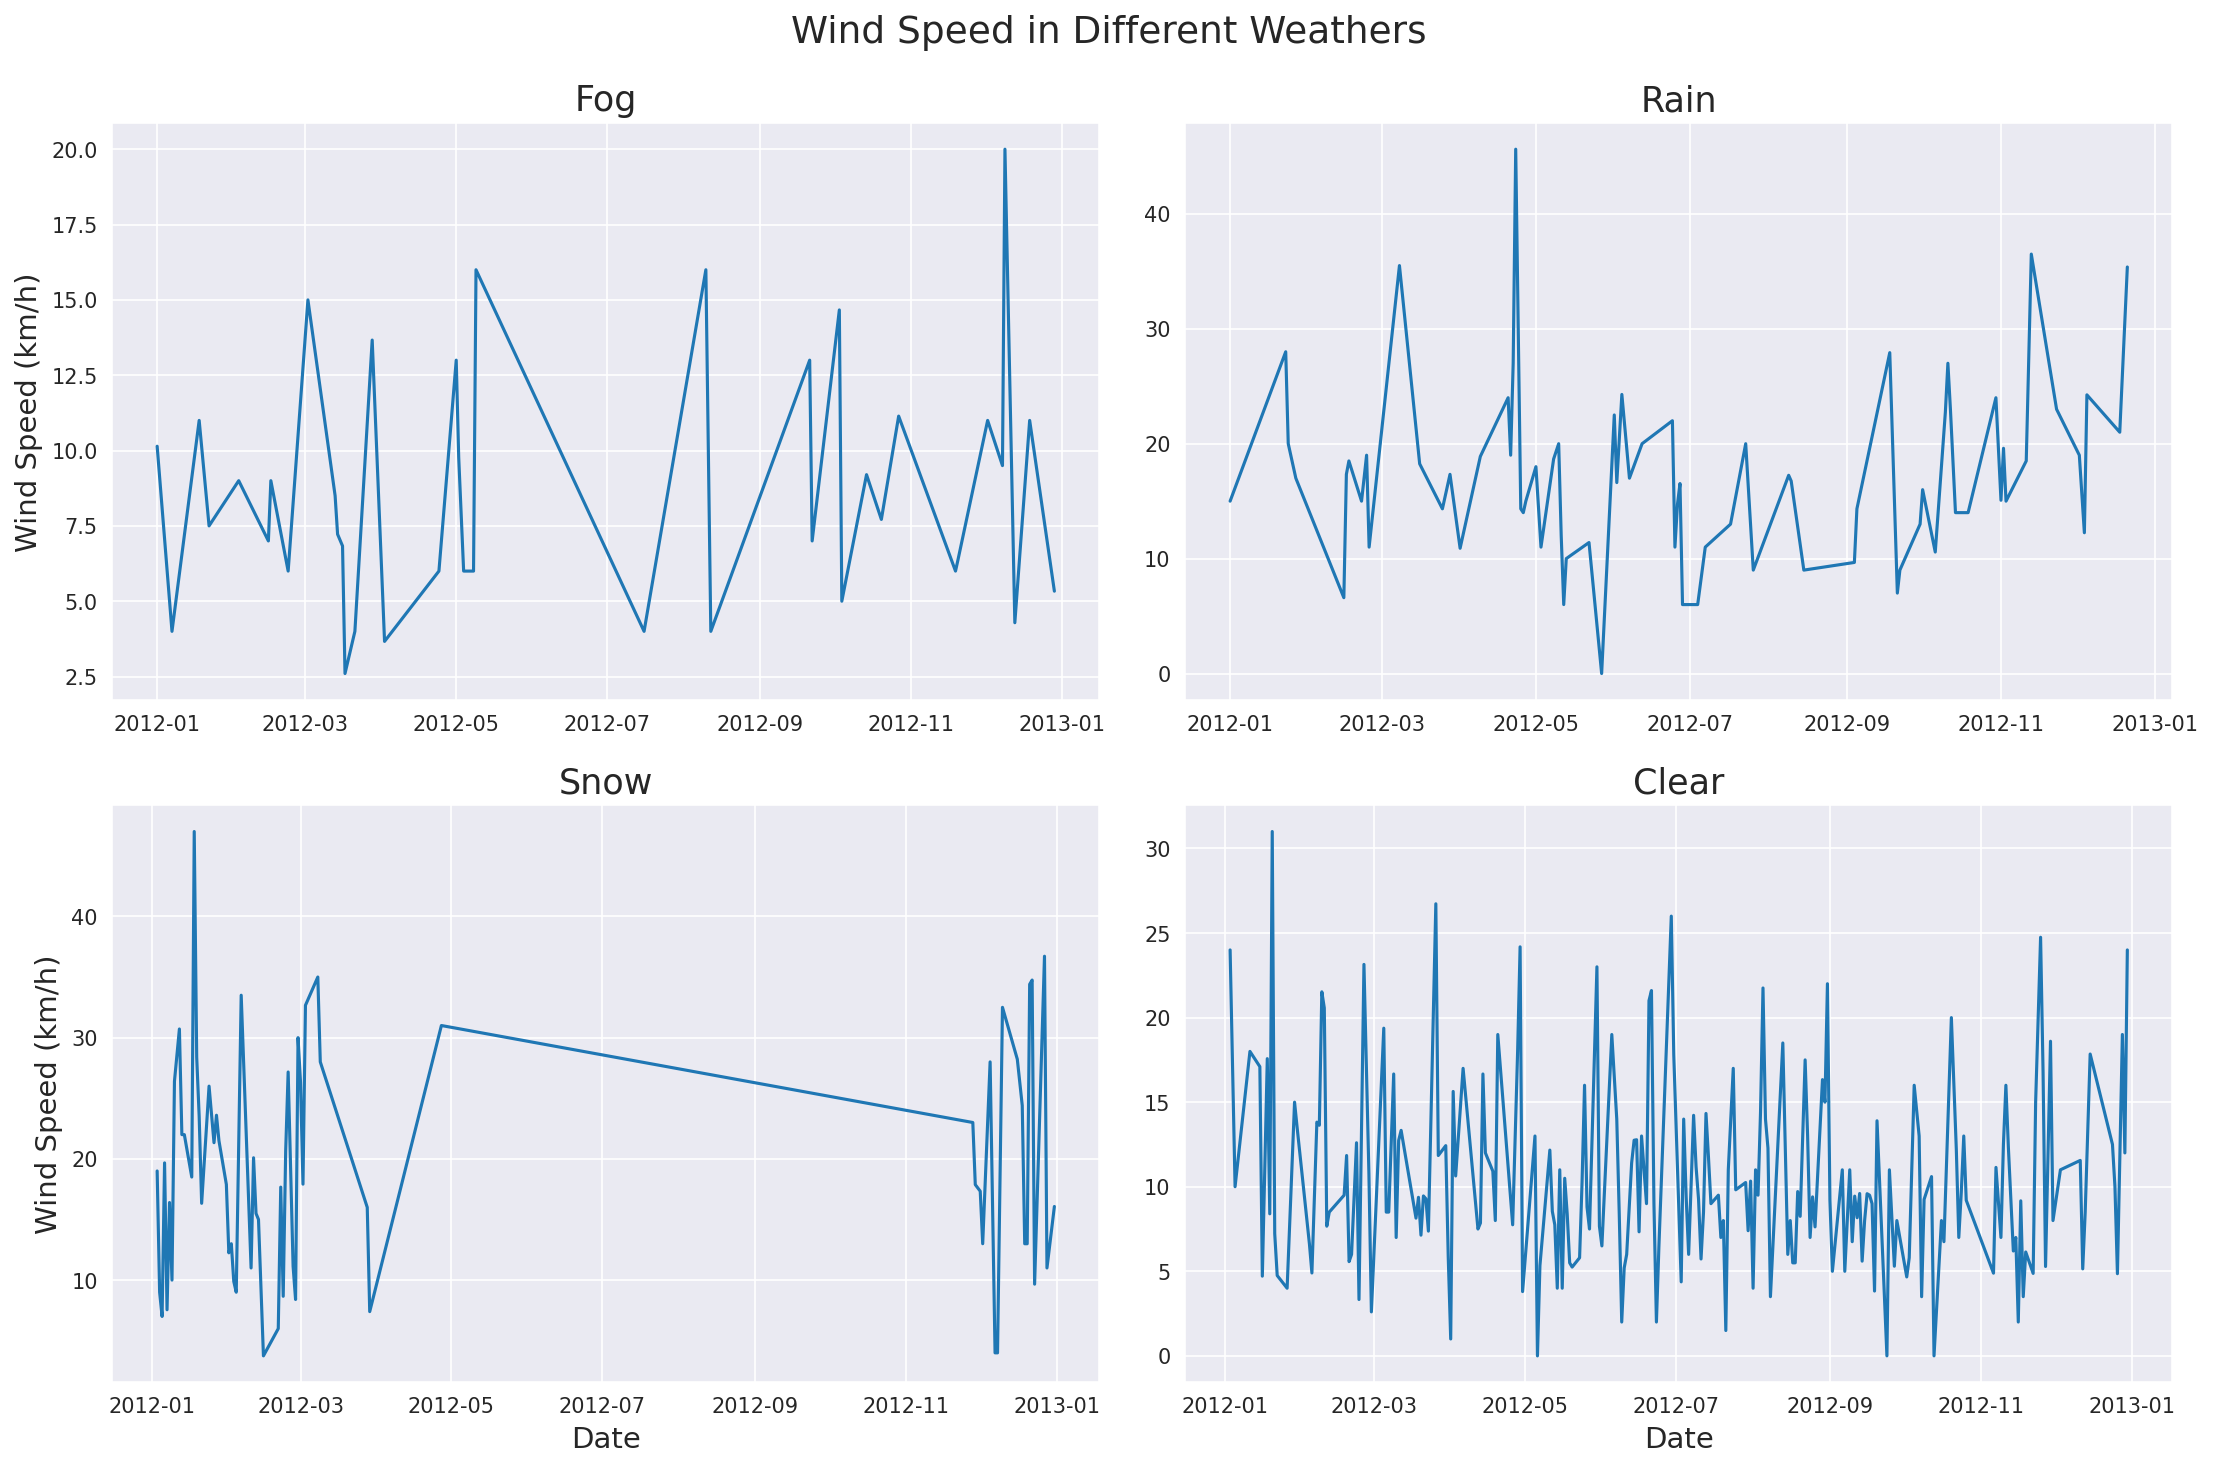

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, weather in enumerate(weather_conditions):
    wd_weather = weather_wd[weather_wd['Weather'] == weather]
    sns.lineplot(x ='Date', y = "Wind Speed_km/h", data= wd_weather, ax=axs[i], errorbar= None)
    axs[i].set_title(f'{weather}')
    axs[i].set_ylabel('Wind Speed (km/h)')

    # Remove y-label from 2nd and 4th subplots
    if i == 1 or i == 3:
        axs[i].set_ylabel('')

    if i < 2:
        # Remove x label and x-ticks
        axs[i].set_xlabel('')

plt.suptitle('Wind Speed in Different Weathers', fontsize=18)
plt.tight_layout()
plt.show()


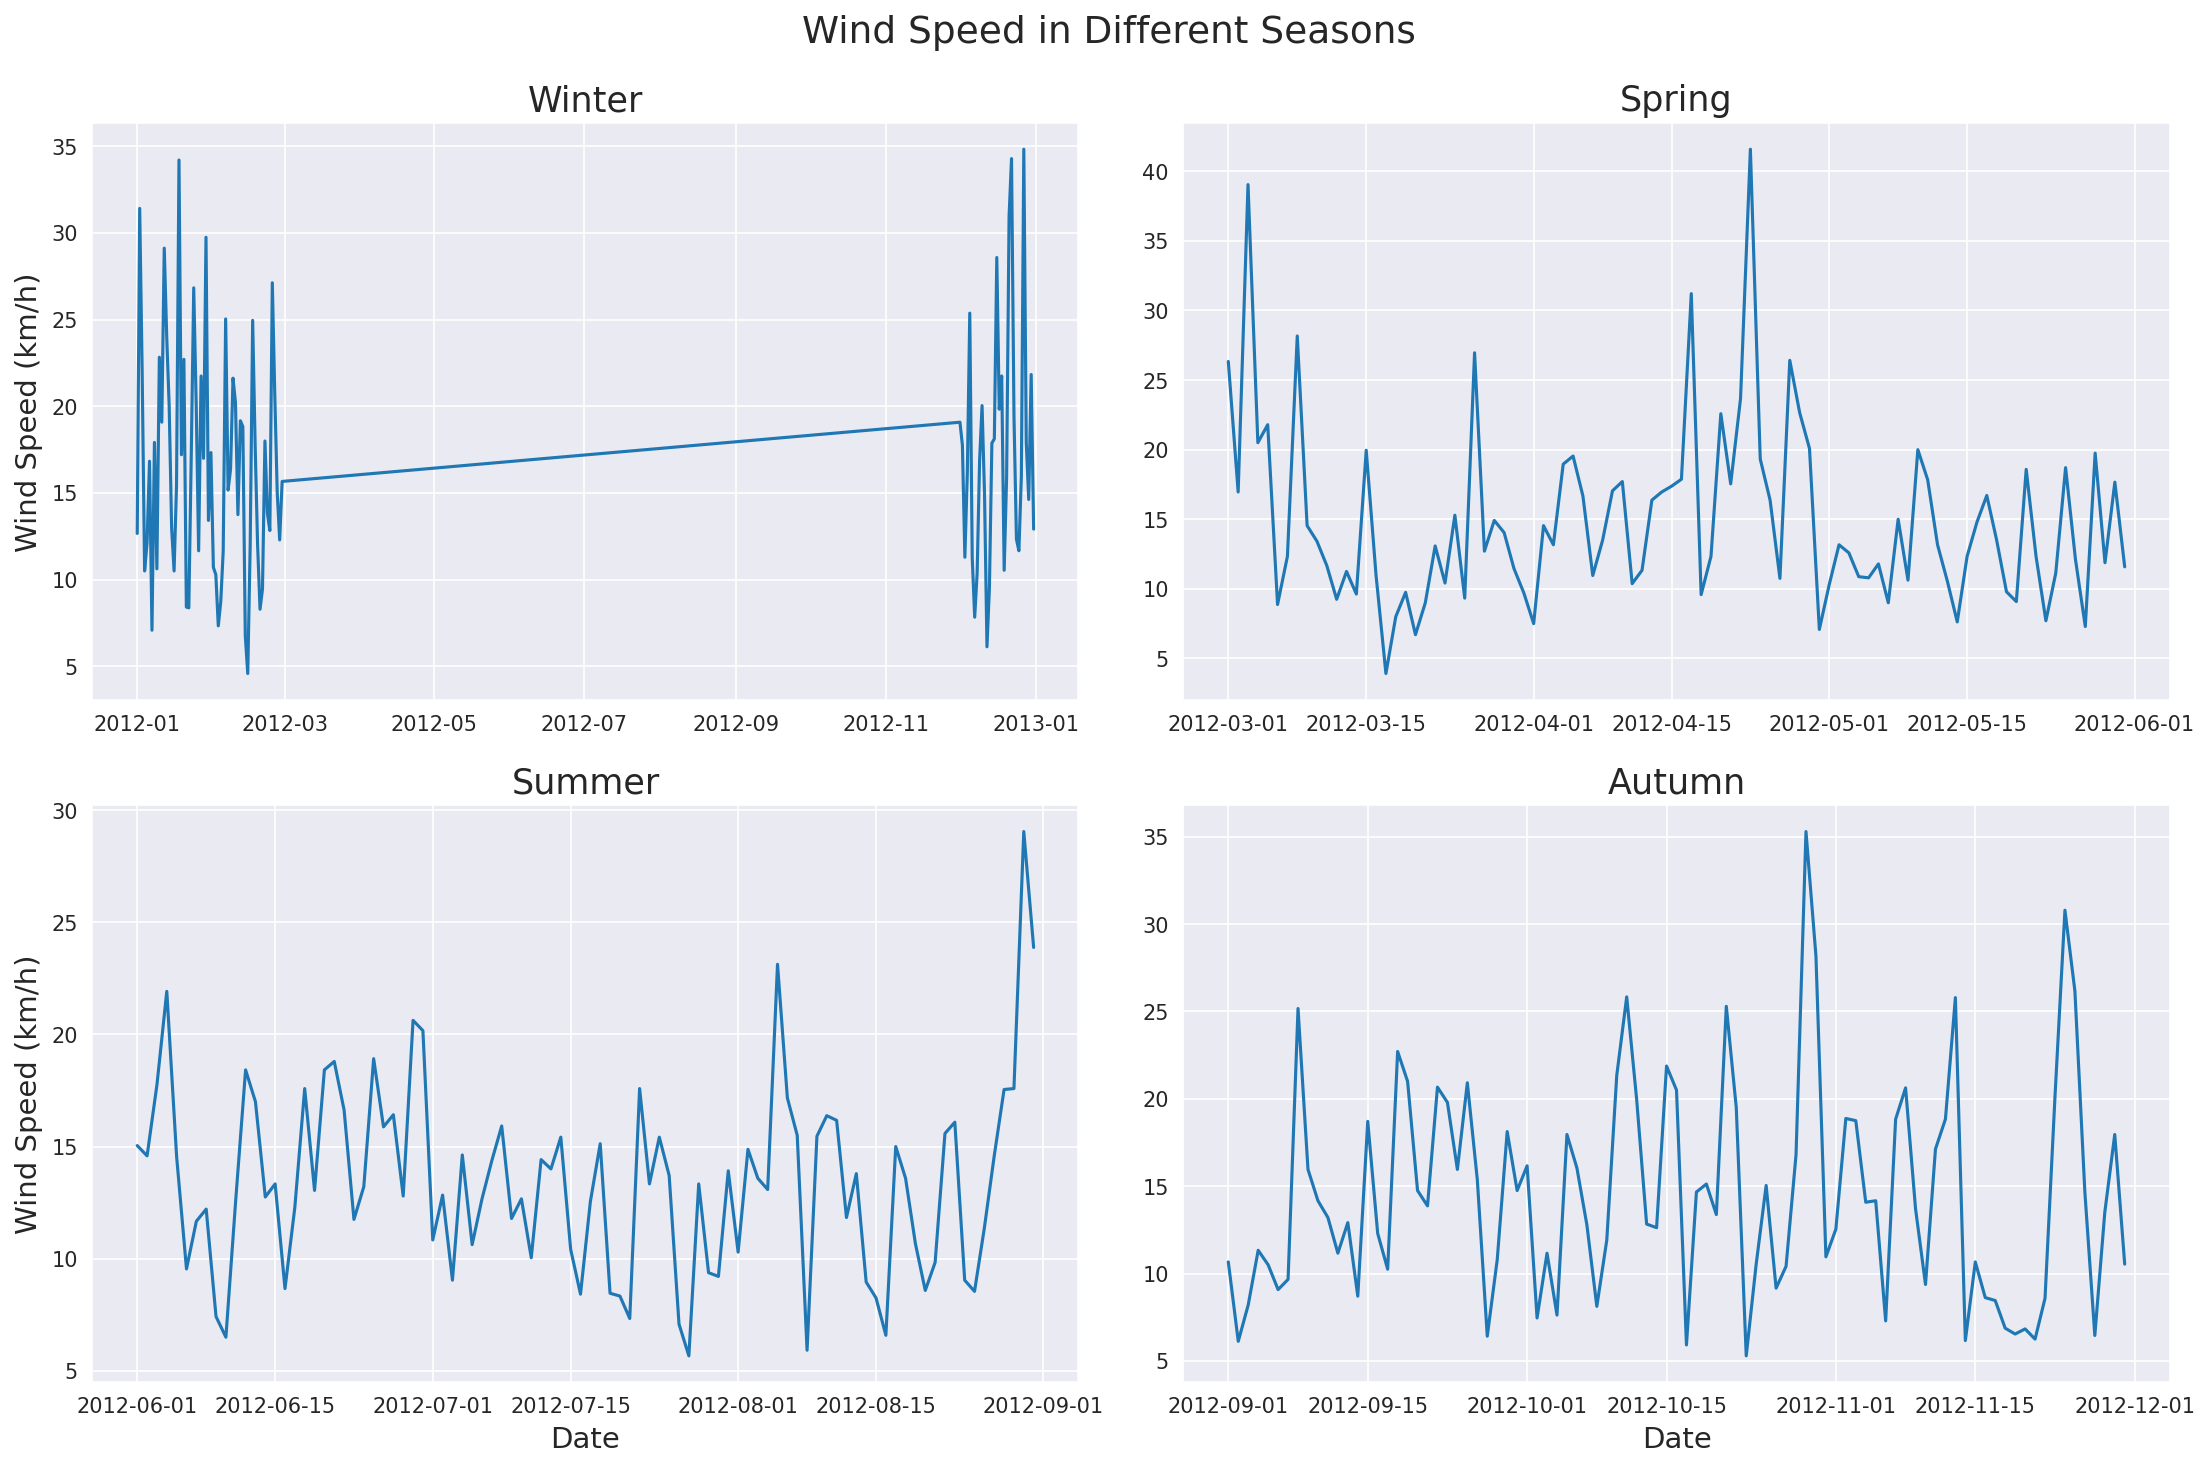

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, season in enumerate(seasons):
    wd_season = wd[wd['Season'] == season]
    sns.lineplot(x ='Date', y = "Wind Speed_km/h", data= wd_season, ax=axs[i], errorbar= None)
    axs[i].set_title(f'{season}')
    axs[i].set_ylabel('Wind Speed (km/h)')

    # Remove y-label from 2nd and 4th subplots
    if i == 1 or i == 3:
        axs[i].set_ylabel('')

    if i < 2:
        # Remove x label and x-ticks
        axs[i].set_xlabel('')

plt.suptitle('Wind Speed in Different Seasons', fontsize=18)
plt.tight_layout()
plt.show()


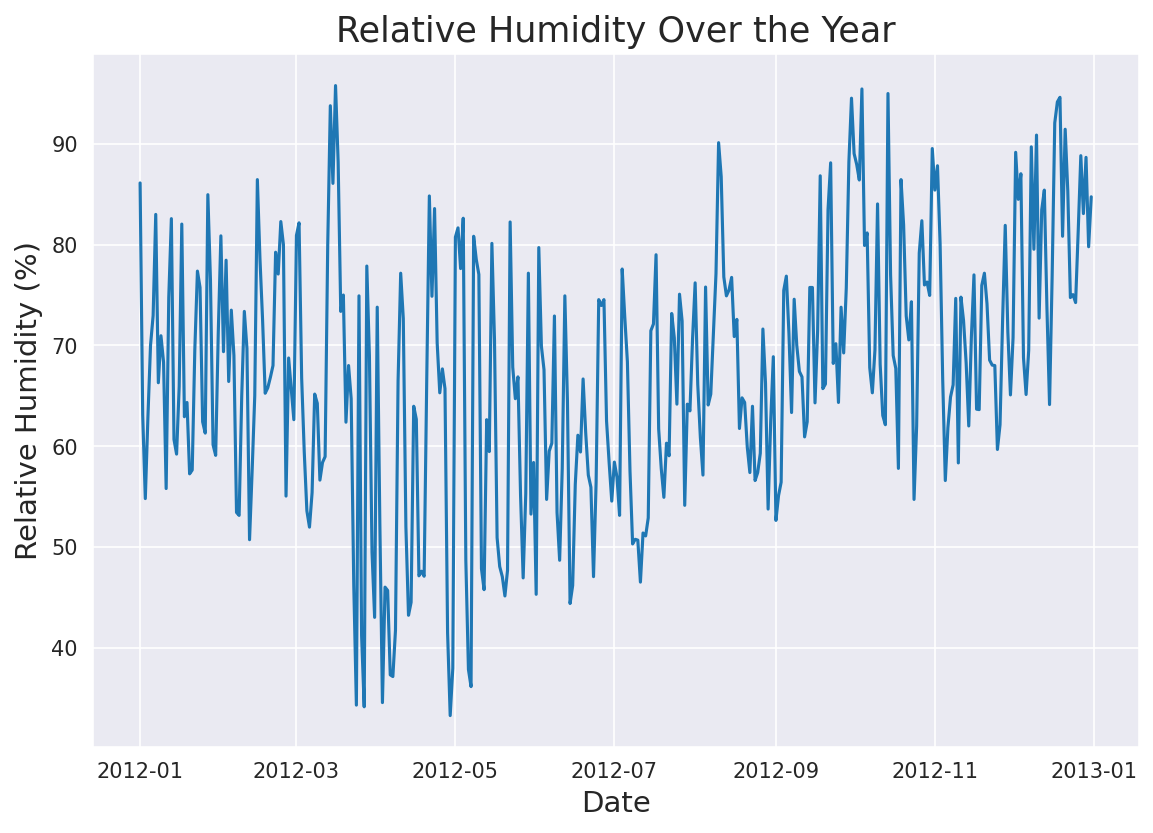

In [ ]:
sns.lineplot(x = 'Date', y = 'Rel Hum_%', data = wd, errorbar= None)
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity Over the Year');

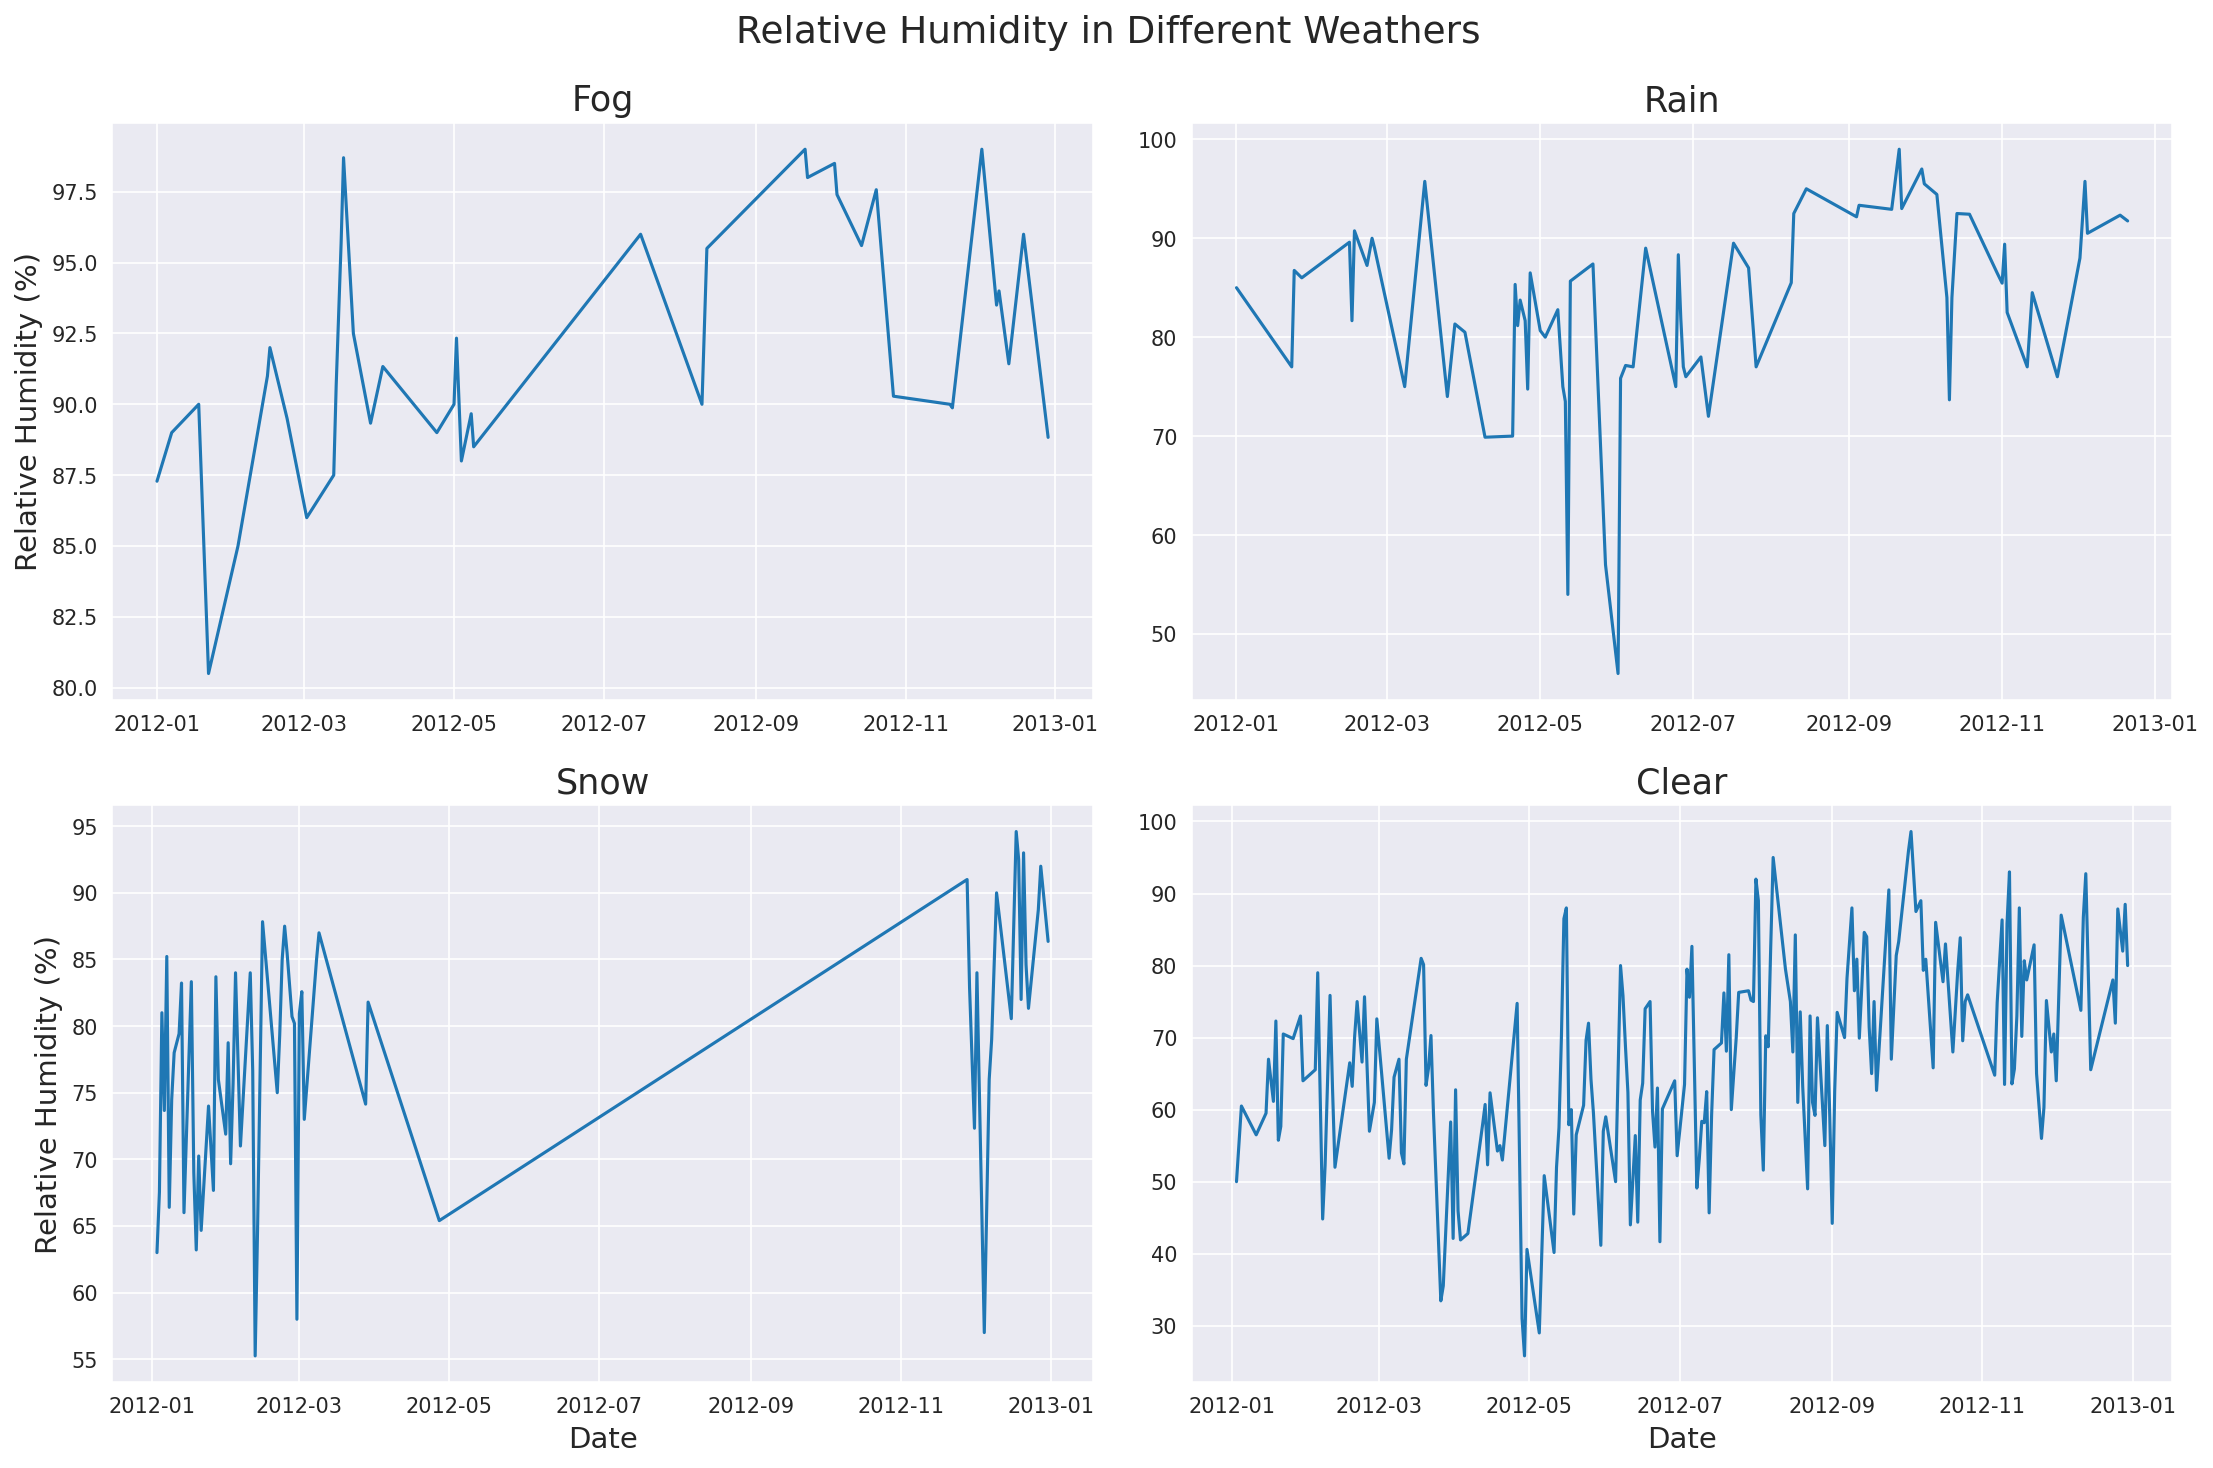

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, weather in enumerate(weather_conditions):
    wd_weather = weather_wd[weather_wd['Weather'] == weather]
    sns.lineplot(x ='Date', y = "Rel Hum_%", data= wd_weather, ax=axs[i], errorbar= None)
    axs[i].set_title(f'{weather}')
    axs[i].set_ylabel('Relative Humidity (%)')

    # Remove y-label from 2nd and 4th subplots
    if i == 1 or i == 3:
        axs[i].set_ylabel('')

    if i < 2:
        # Remove x label
        axs[i].set_xlabel('')

plt.suptitle('Relative Humidity in Different Weathers', fontsize=18)
plt.tight_layout()
plt.show()


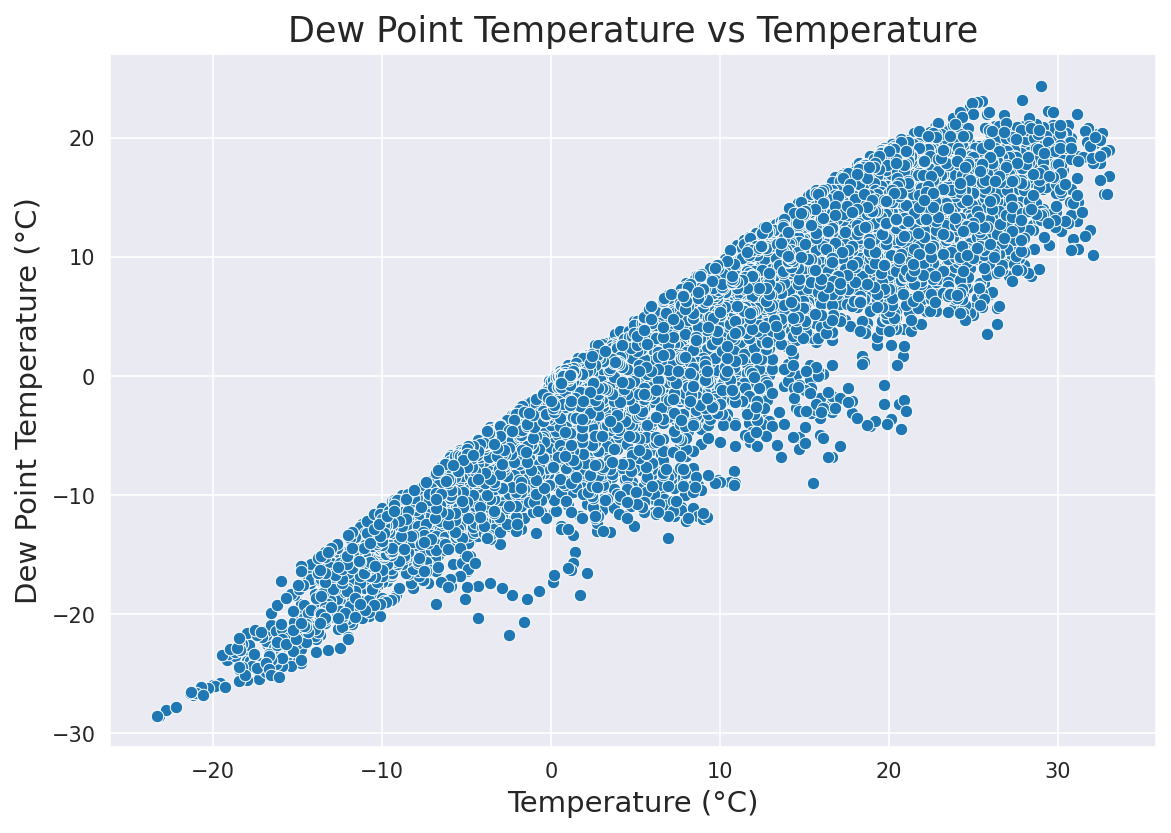

In [ ]:
sns.scatterplot(x = "Temp_C", y = "Dew Point Temp_C", data = wd)
plt.xlabel("Temperature (°C)");
plt.ylabel("Dew Point Temperature (°C)")
plt.title('Dew Point Temperature vs Temperature');